<a href="https://colab.research.google.com/github/sametgirgin/Machine-Learning-Intro/blob/master/Introduction_to_Classification_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#INTRODUCTION TO CLASSIFICATION MODELLING

**regression model**
A type of model that outputs continuous (typically, floating-point) values.

Today's lesson:

**classification model**
A type of machine learning model for distinguishing among two or more discrete classes.

Both are types of:

**supervised machine learning**
Training a model from input data and its corresponding labels. Supervised machine learning is analogous to a student learning a subject by studying a set of questions and their corresponding answers. After mastering the mapping between questions and answers, the student can then provide answers to new (never-before-seen) questions on the same topic. Compare with unsupervised machine learning.

For examples, see this diagram by Andrew Ng in Harvard Business Review.

```
https://hbr.org/resources/images/article_assets/2016/10/W161026_NG_WHATMACHINEv2.png
```



In [0]:
#Linear Regression vs Logistic Regression, for Classification

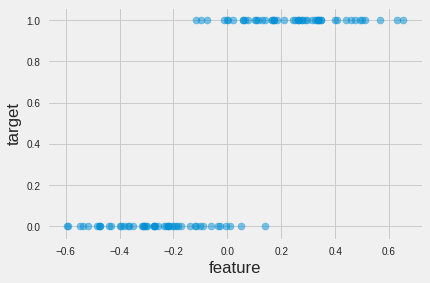

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate data 
x, y = make_classification(n_samples=100, n_features=1, n_informative=1, 
       n_redundant=0,n_classes=2, n_clusters_per_class=1, class_sep=0.25,
       random_state=0)

plt.style.use('fivethirtyeight')
plt.scatter(x, y, s=50, alpha=0.5)
plt.xlabel('feature')
plt.ylabel('target');

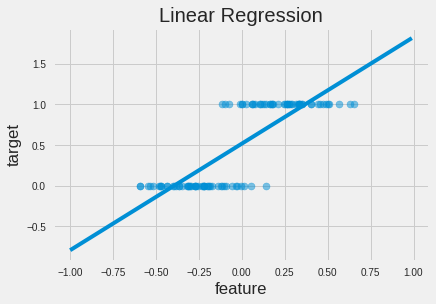

In [16]:
#the value is 0 or 1 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

inputs = [[x/100] for x in range(-100, 100)]
predictions = model.predict(inputs)

plt.scatter(x, y, s=50, alpha=0.5)
plt.plot(inputs, predictions)
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Linear Regression');

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


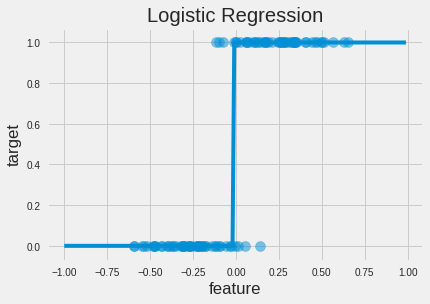

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x, y)
predictions = model.predict(inputs)

plt.scatter(x, y, s=100, alpha=0.5)
plt.plot(inputs, predictions)
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Logistic Regression');

#It is for classification problem not regression problems

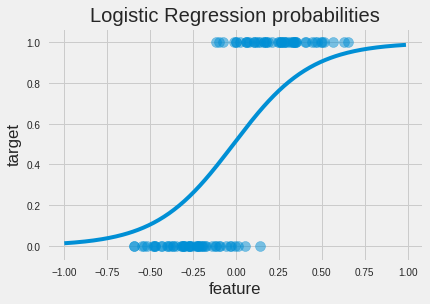

In [18]:
#model.fit(x, y)
#predictions = model.predict(inputs) #In Logistic Regression

predictions = model.predict_proba(inputs)[:, 1]
plt.scatter(x, y, s=100, alpha=0.5)
plt.plot(inputs, predictions)
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Logistic Regression probabilities');

Predict survival on the Titanic


Load data

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

train, test = train_test_split(sns.load_dataset('titanic'), random_state=0)
train.shape, test.shape

((668, 15), (223, 15))

In [24]:
train.head()
#1 means survived 0 means did not survive

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
253,0,3,male,30.0,1,0,16.1000,S,Third,man,True,NaN,Southampton,no,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,yes,True


In [25]:
train.survived.value_counts(normalize=True)

0    0.613772
1    0.386228
Name: survived, dtype: float64

**Majority classifier**


*Data Science for Business *recommends,

For classification tasks, one good baseline is the majority classifier, a naive classifier that always chooses the majority class of the training dataset. ...

This may seem like advice so obvious it can be passed over quickly, but it is worth spending an extra moment here. There are many cases where smart, analytical people have been tripped up in skipping over this basic comparison. For example, an analyst may see a classification accuracy of 94% from her classifier and conclude that it is doing fairly well—when in fact only 6% of the instances are positive. So, the simple majority prediction classifier also would have an accuracy of 94%.

In [0]:
predictions = [0] * len(train) #list of zero multiply by number

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(train.survived, predictions)

0.6137724550898204

In [30]:
from sklearn.metrics import confusion_matrix

def matrix(y_true, y_pred):
    data = confusion_matrix(y_true, y_pred)
    index = ['Actual 0', 'Actual 1']
    columns = ['Predicted 0', 'Predicted 1']
    return pd.DataFrame(data, index, columns)
                        
matrix(train.survived, predictions)

#predicted 1 zero because we can not predict someone as survives

,Predicted 0,Predicted 1
Actual 0,410,0
Actual 1,258,0


In [34]:
from sklearn.metrics import recall_score
recall_score(train.survived, predictions)
#It is the evidence of this model is not suitable for this example

0.0

In [32]:
# Recall
0 / 258

0.0

In [35]:
# Accuracy #Correct prediction/Total prediction
410 / (410 + 258)

0.6137724550898204

**Feature preprocessing**

---



In [39]:
train[['sex', 'age']].info()

#The sex represent string value

#Lets check the woman and the children rescued first rule 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 2 columns):
sex    668 non-null object
age    535 non-null float64
dtypes: float64(1), object(1)
memory usage: 35.7+ KB


**Encode sex **

In [0]:
#train['female'] = train.sex == 'female'
#test['female'] = test.sex == 'female'

#female is TRUE and male si FALSE. Convert them to BOOLEAN VALUE

train['female'] = (train.sex == 'female').astype(int)
test['female'] = (test.sex == 'female').astype(int)

In [47]:
train[['sex', 'female']].head()

,sex,female
105,male,0
68,female,1
253,male,0
320,male,0
706,female,1


**Impute age**

For train and test dataset

In [48]:
train.age.isnull().sum()

#How many missing value in the age column

133

In [49]:
train.age.mean()

#What is the mean age of the train dataset

29.9

In [51]:
train.age.fillna(train.age.mean(), inplace=True)
train.age.isnull().sum()

#We filled the missing values and there is no missing value now...

0

In [54]:
test.age.isnull().sum()
#test dataset missing values

44

In [55]:
test.age.mean()

29.098715083798883

In [56]:
test.age.fillna(train.age.mean(), inplace=True)
test.age.isnull().sum()

0

**Logistic Regression**

In [57]:
features = ['female', 'age']
target = 'survived'

model = LogisticRegression()
model.fit(train[features], train[target])

# Train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

# Test accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.7889221556886228
Test accuracy: 0.7802690582959642


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
matrix(y_true, y_pred)#import matrix_confusion

,Predicted 0,Predicted 1
Actual 0,115,24
Actual 1,25,59


In [59]:
recall_score(y_true, y_pred)
#%70 of the situation actually survived

0.7023809523809523

In [60]:
# Recall
59 / (59 + 25)

0.7023809523809523

In [63]:
# Accuracy
(59 + 115) / (59 + 115 + 24 + 25)

0.7802690582959642

In [61]:
model.coef_, model.intercept_

(array([[ 2.43123179, -0.00948601]]), array([-1.0976689]))

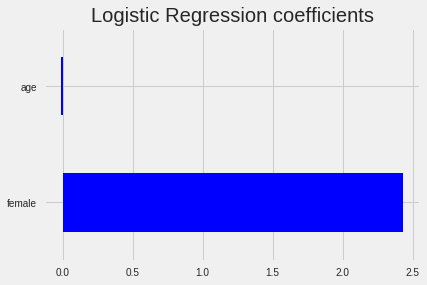

In [65]:
pd.Series(model.coef_[0], features).plot.barh(color='blue')
plt.title('Logistic Regression coefficients');

#2.4312... is the coefficient pf the female
#-0.009... is the coefficient of the age (The coefficient is minus because of the 
#wide range of the age)

**Decision Tree**

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(train[features], train[target])

# Train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

# Test accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.7949101796407185
Test accuracy: 0.7757847533632287


In [67]:
recall_score(y_true, y_pred)

0.75

In [68]:
matrix(y_true, y_pred)

,Predicted 0,Predicted 1
Actual 0,110,29
Actual 1,21,63


In [70]:
#recall_score
63/(21+63)

0.75

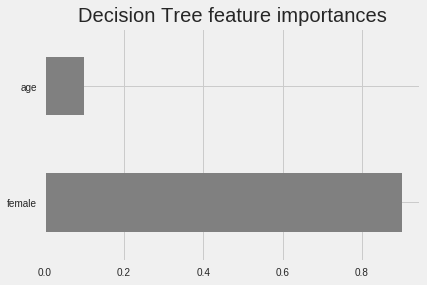

In [72]:
pd.Series(model.feature_importances_, features).plot.barh(color='gray')
plt.title('Decision Tree feature importances');

#A non-linear regr. not linear regr.

**Visualize the tree**

**To install Graphviz**

        On Google Colab, run the cell below.

        On your local machine, I recommend you use Anaconda instead: conda install python-graphviz


In [73]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


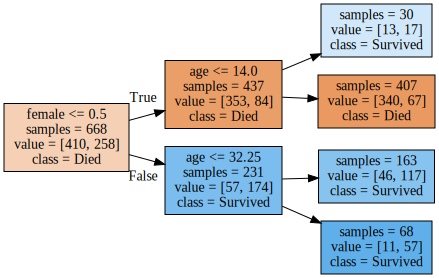

In [74]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None, feature_names=features, 
                           class_names=['Died', 'Survived'], 
                           filled=True, impurity=False, rotate=True)
graphviz.Source(dot_data)

**Another visualization**


Install dtreeviz and dependencies

In [75]:
!pip install dtreeviz
!apt install graphviz
!apt install xdg-utils

  Stored in directory: /root/.cache/pip/wheels/2a/d7/00/3937aa5f749f35959a15e87deb0d8782dbfa91f870cabdd696
Successfully built dtreeviz
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libauthen-sasl-perl libdata-dump-perl libencode-locale-perl
  libfile-basedir-perl libfile-desktopentry-perl libfile-listing-perl
  libfile-mimeinfo-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libio-html-perl
  libio-socket-ssl-perl libipc-system-simple-perl liblwp-mediatypes-perl
  liblwp-protocol-https-perl libmailto

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


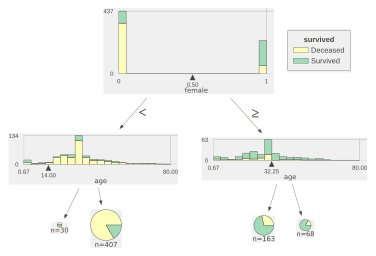

In [76]:
from dtreeviz.trees import *

dtreeviz(model,
         train[features],
         train[target],
         target_name=target,
         feature_names=features, 
         class_names=['Deceased', 'Survived']) 